In [1]:
import guitarsounds
from guitarsounds import Sound, SoundPack, show

# guitarsounds API tutorial

The reference for the API can be found at [this link](https://olivecha.github.io/guitarsounds/).

The example files can be downloaded from the [git](https://github.com/olivecha/guitarsounds/tree/main/example_sounds).

## Loading a sound and analyzing it

The `Sound` class allows the loading of a .wav soundfile that can then be analyzed

The sound has to be loaded and conditioned

In [2]:
# Loading a wood guitar first string sound from the examples
# the name of the sound and fundamental can be user specified
mysound = Sound('example_sounds/Wood_Guitar/Wood_E1.wav', name='wood', fundamental=330)

# we condition the loaded sound
mysound.condition()

### Testing the sound loading

The `Sound` class contains multiple signals (`raw_signal`, `filtered_signal`, ...), the main signal is under the attribute `.signal`, so the listen methods have to be called on this signal.  When the plot methods are called from the `Sound` class, the are a shorthand to call them on the main signal (`Sound.plot.signal() == Sound.signal.plot.signal()`)

So here we plot the sound signal and we listen to it : 

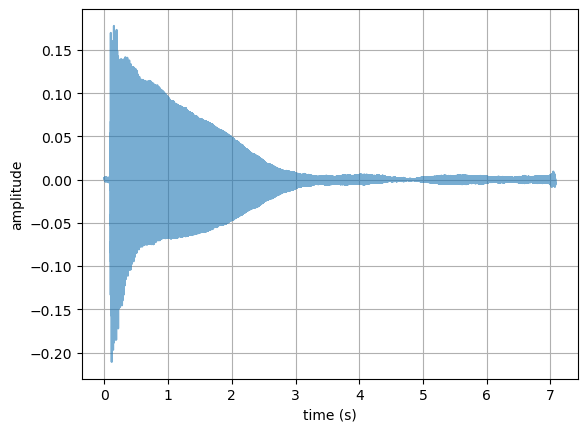

In [16]:
mysound.signal.listen()  # creates the listening box

mysound.plot.signal() # creates the signal plot

show() # display the plot

## Analyzing the sound

The description of the different analysis plots can be found by typing `help(mysound.signal.plot)`.

For example, we can plot the envelop, and the normalized envelop of the signal : 

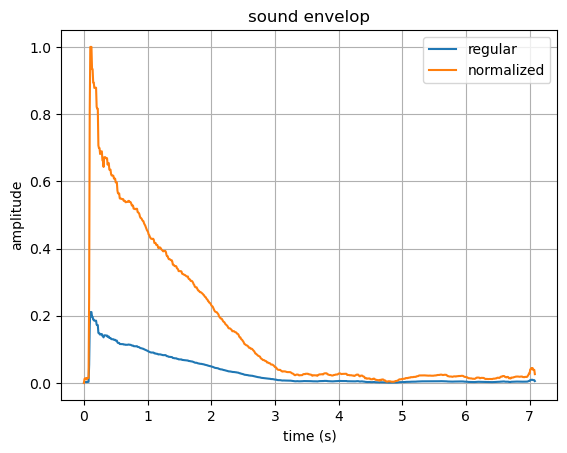

In [18]:
# regular plot
mysound.plot.envelop(label='regular')

# normalized plot by calling .normalize() after the signal
# matplotlib key word arguments can be passed to plot methods (label = 'normalized')
mysound.signal.normalize().plot.envelop(label='normalized')  

# all matplotlib.pyplot functions are available as guitarsounds.plt
guitarsounds.plt.legend()
guitarsounds.plt.title('sound envelop')

# remember to show()
show()

### Some advanced analysis functions

The analysis functions applied to the frequency bins of the sound can only be called from the `Sound` class.

The signals associated to the frequency bins are stored in the `Sound` class as their name.

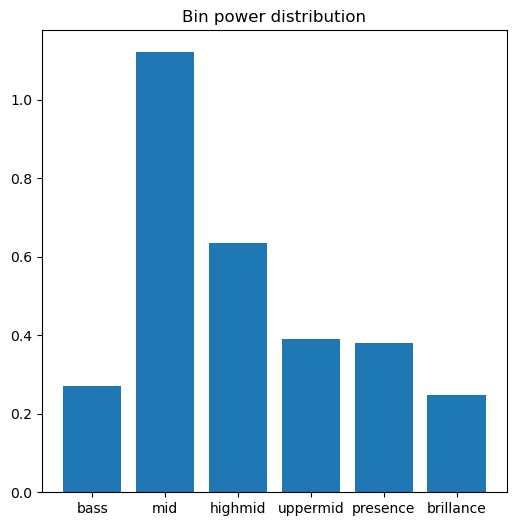

In [20]:
# Fequency bin power histogram
mysound.bin_hist()

# adding a title
guitarsounds.plt.title('Bin power distribution')

show()

  Frequency (Hz)    Damping ratio (%)
----------------  -------------------
         328.708            0.0555961
         657.133            0.0268697
         985.559            0.0197398
        1314.41             0.0126483
        1642.97             0.0166637
        1971.97             0.0213548


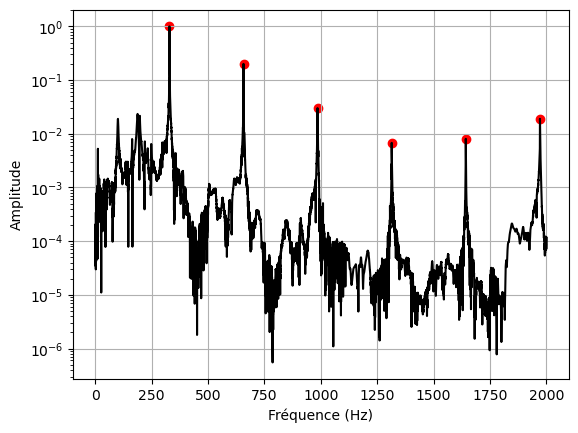

In [23]:
# Damping ratio data of every peak in the fourier transform and peaks plot of the sound
mysound.peak_damping()

mysound.plot.peaks()

show()

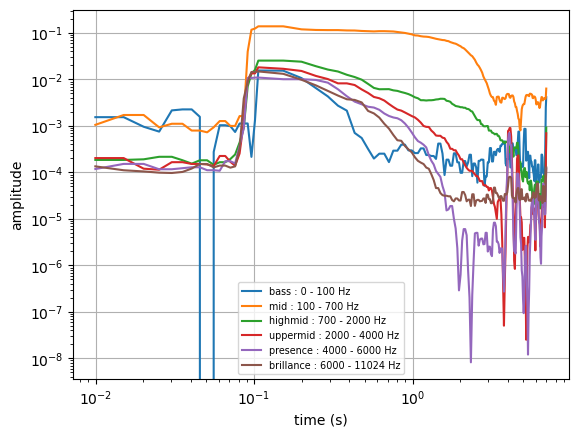

In [27]:
# A plot of the logarithmic envelop for every bin in the Sound
mysound.plot_freq_bins()
show()

In [31]:
# Listening to a specific sound bin
# normalizing so the sound is louder
mysound.mid.normalize().listen()

## Example of an analysis of one sound

1. Does the signal loudness impacts its computed timbral attributes ?

2. How does the timbre varies across frequency bins ?

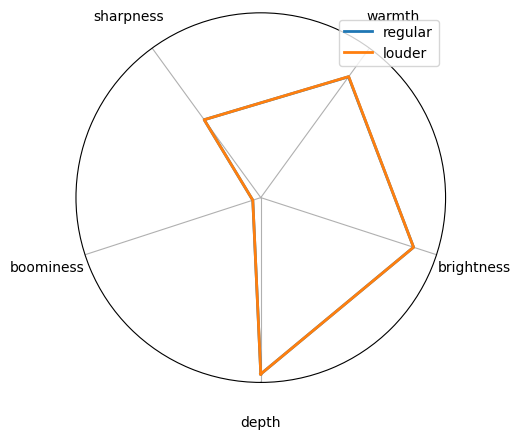

In [35]:
# Timbral attributes not loud
mysound.plot.timbre(label='regular')

# Timbral attributes loud
mysound.signal.normalize().plot.timbre(label='louder')

# add labels to the legend 
guitarsounds.plt.legend()

show()

# it does not

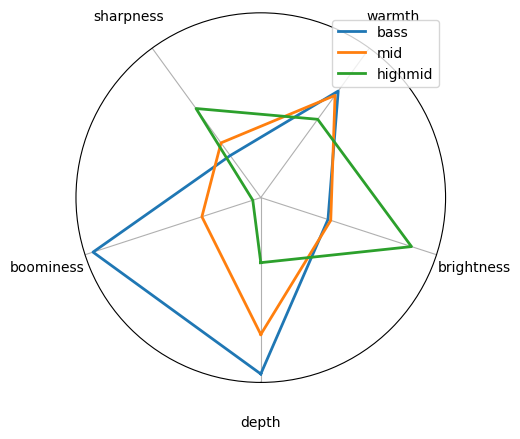

In [37]:
# bass bin
mysound.bass.plot.timbre(label='bass')

# mid bin
mysound.mid.plot.timbre(label='mid')

# high mid bin
mysound.highmid.plot.timbre(label='highmid')

guitarsounds.plt.legend()
show()

# Brightness and warmth do not vary a lot from bass to mid, but boominess and depth do across the three bins.

## Sound parameters

The parameters used to analyse the sounds can be changed in the `guitarsounds.analysis.SP` variable.

For example : 

In [15]:
# displaying info for all the parameters
guitarsounds.analysis.SP.more_info()

general
	 octave_fraction : 3 [Fraction of the octave used for octave computations]
	 fft_range : 2000 [Maximum frequency in the Fourier transform plot]
onset
	 onset_delay : 100 [Delay before the onset (attack) to keep when trimming the signal]
	 onset_time : 0.005 [Time interval used to detect the onset in seconds]
envelop
	 frame_size : 524 [Number of samples in the array used to compute a point of the envelop]
	 hop_length : 200 [Number of samples between envelop points]
log_envelop
	 start_time : 0.01 [First point in the log scale envelop]
	 min_window : None [Minimum window size for the log envelop computed from start_time by default]
	 max_window : 2048 [Maximum window size for the log envelop in samples]
fundamental
	 min_freq : 60 [Minimum frequency for the fundamental finding algorithm (Hz)]
	 max_freq : 2000 [Maximum frequency for the fundamental finding algorithm (Hz)]
	 frame_length : 1024 [Frame length in samples to compute the fundamentals across the signal]
bins
	 bass 

In [16]:
# changing the Fourier Transform range from 2000 Hz to 3000 Hz
guitarsounds.analysis.SP.change('fft_range', 3000)

In [18]:
# info function without descriptions
guitarsounds.analysis.SP.info()

general
	 octave_fraction : 3
	 fft_range : 3000
onset
	 onset_delay : 100
	 onset_time : 0.005
envelop
	 frame_size : 524
	 hop_length : 200
log_envelop
	 start_time : 0.01
	 min_window : None
	 max_window : 2048
fundamental
	 min_freq : 60
	 max_freq : 2000
	 frame_length : 1024
bins
	 bass : 100
	 mid : 700
	 highmid : 2000
	 uppermid : 4000
	 presence : 6000
damping
	 lower_threshold : 0.05


## Analysing more sounds
lets load a second sound from the carbon guitar data set and combine it with the first sound into a soundpack


In [19]:
# here we let the scrit determine the fundamental
mysound_carbon = Sound('example_sounds/Carbon_Guitar/Carbon_E1.wav', name='carbon') 
mysound_carbon.condition()

mysound_carbon.signal.listen()

### Combining two sounds for analysis

Two or more sounds can be combined into a `SoundPack` to analyze them comparatively

In [20]:
# creating a soundpack from two sounds
mypack = SoundPack(mysound, mysound_carbon)

## dual sound analysis

A set of methods from the `SoundPack` object can be applied to compare the two sounds, see `help(SoundPack)`

Some methods are only available for packs with two sounds

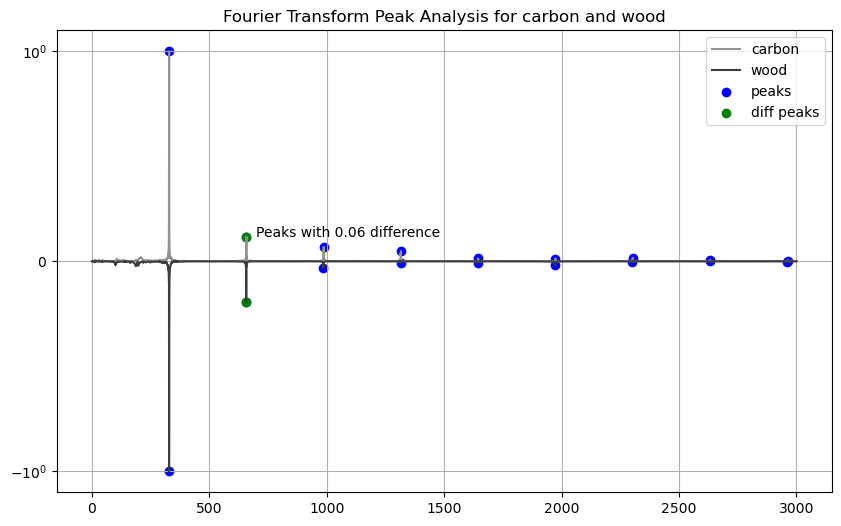

In [21]:
# a method to compare the fourier transform peaks of the two signals.
mypack.compare_peaks()
show()

# here the second peaks have a 0.06 difference, so the carbon signal would have a slightly lower amplitude
# aroud 660 Hz

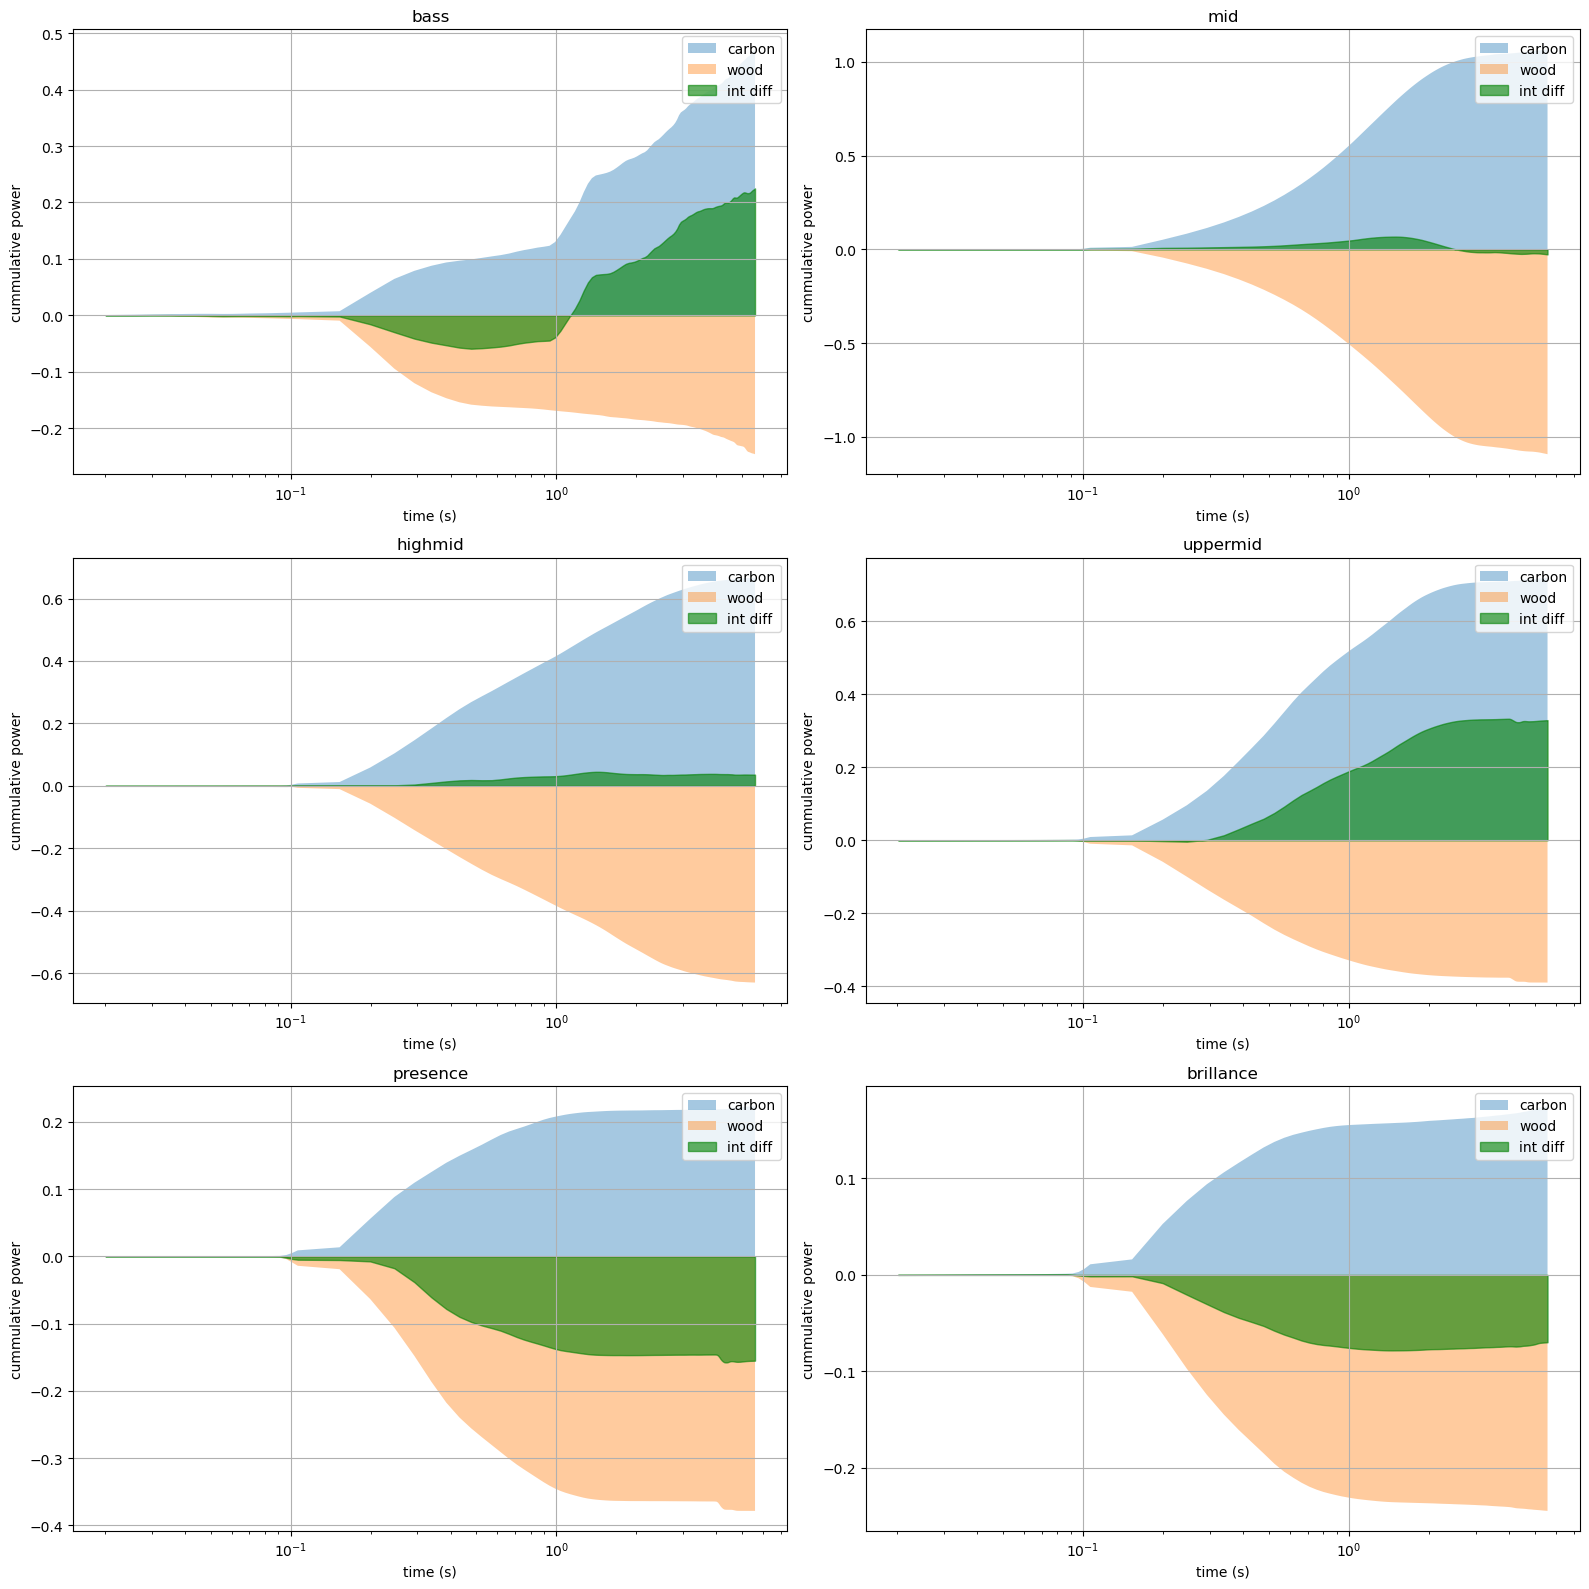

In [22]:
# Comparing the cumilative power in every frequency bin
mypack.integral_compare()
show()

# For example the bass signal decays faster for the wood guitar.

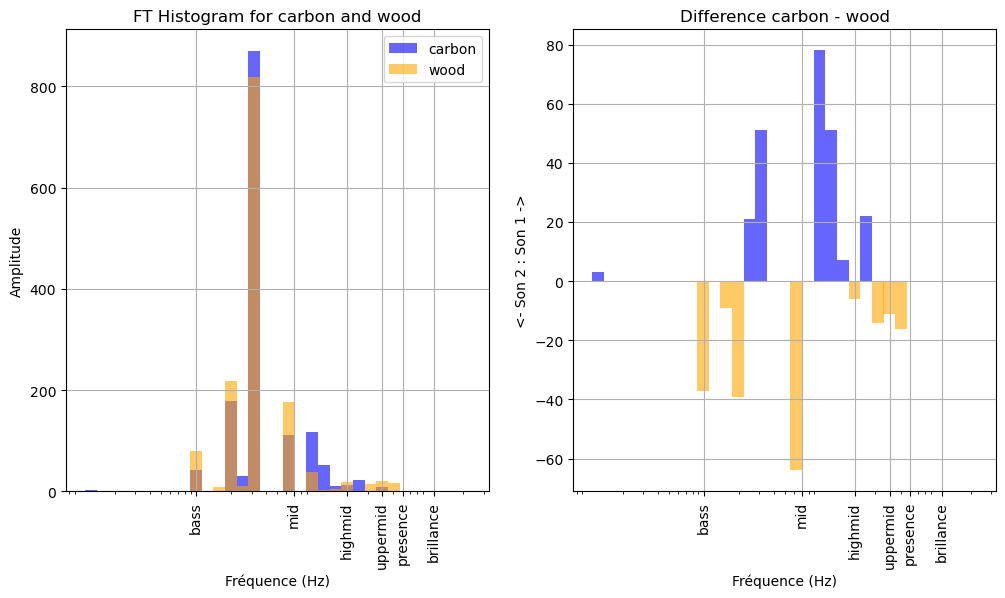

In [27]:
# difference between the fourier transforms of the two signals
mypack.fft_diff(ticks='bins') # using frequency bins as ticks
show()

## Comparing a higher number of sounds

The soundpack object can be created using an arbitrary number of sounds. 

Also, it can be constructed directly from files

Here we make a soundpack containing a signal for every string of the wood guitar. The order of the sounds is not important as they are sorted according to their fundamental.

In [8]:
# a list of files
files = ['example_sounds/Wood_Guitar/Wood_A5.wav',
         'example_sounds/Wood_Guitar/Wood_B2.wav',
         'example_sounds/Wood_Guitar/Wood_D4.wav',
         'example_sounds/Wood_Guitar/Wood_E1.wav',
         'example_sounds/Wood_Guitar/Wood_E6.wav',
         'example_sounds/Wood_Guitar/Wood_G3.wav', ]

# a list of names for the sounds
names = ['A5', 'B2', 'D4', 'E1', 'E6', 'G3']

# names are assigned when creating the soundpack
wood_pack = SoundPack(files, names=names)

### analysis for multiples sounds

Lets compute various analysis for the six sounds.

In [9]:
# a table containing the power of every frequency bin
wood_pack.bin_power_table()

___ Signal Power Frequency Bin Distribution ___ 

bin               E6        G3        B2        A5        D4        E1
---------  ---------  --------  --------  --------  --------  --------
bass       2.14381    0.238342  0.148242  0.655961  0.242029  0.242898
mid        1.02106    0.233003  0.530352  1.02247   1.53934   1.08717
highmid    0.507552   0.65508   0.707749  1.23685   0.697274  0.629823
uppermid   0.149193   0.491706  0.395454  0.18279   0.173163  0.38931
presence   0.0505559  0.387767  0.344764  0.513844  0.133688  0.378288
brillance  0.364715   1.14352   0.232678  1.08745   0.185397  0.244198


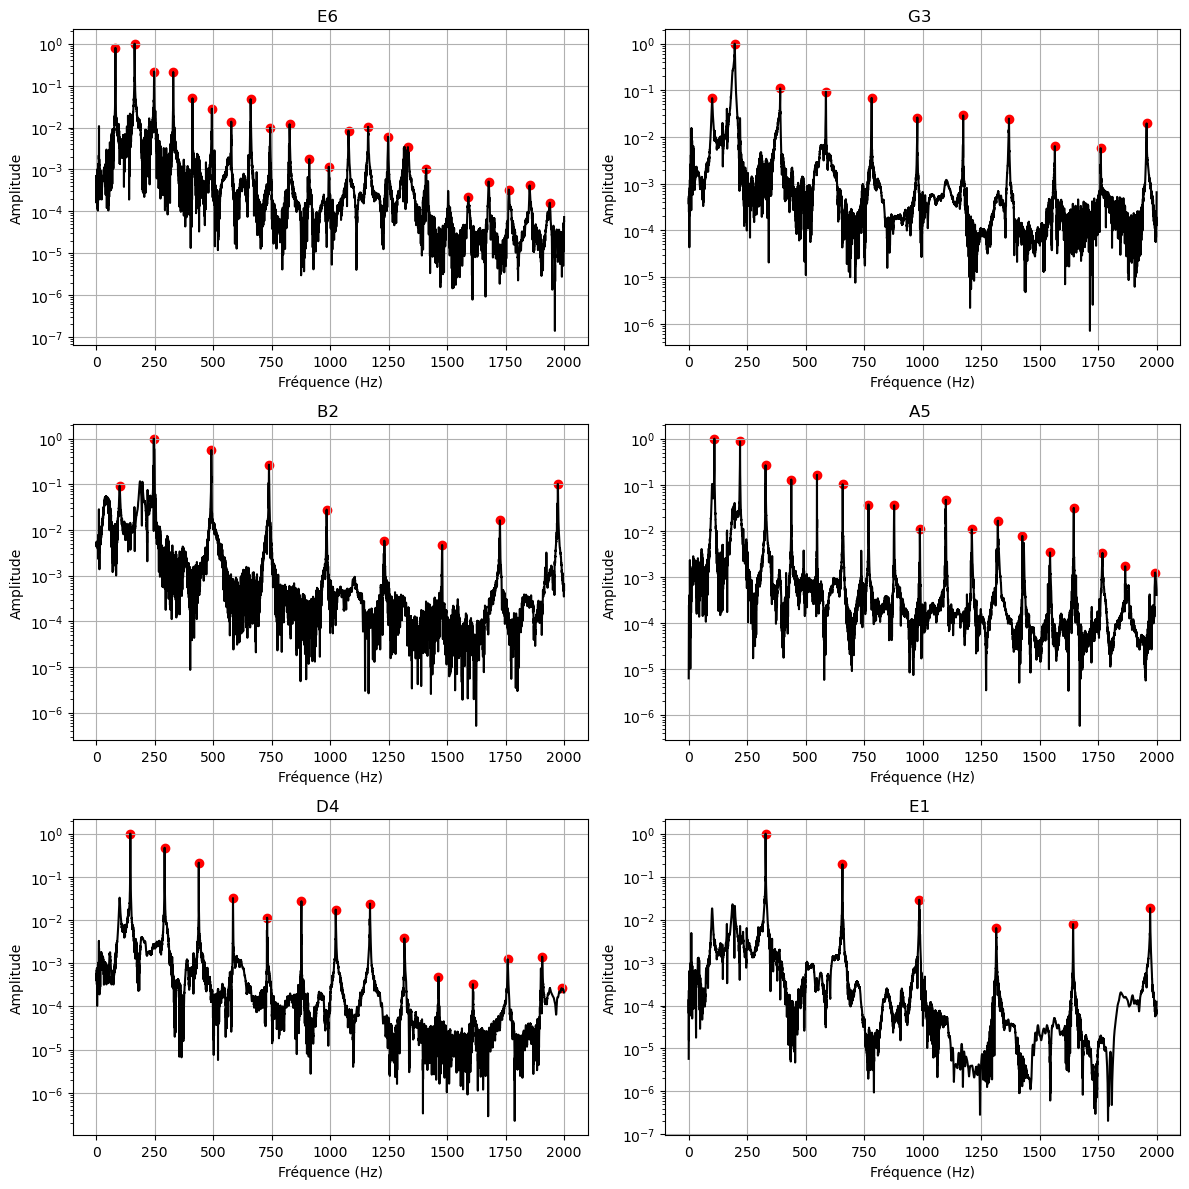

In [12]:
# A plot for every signal
wood_pack.compare_plot('peaks')
show()

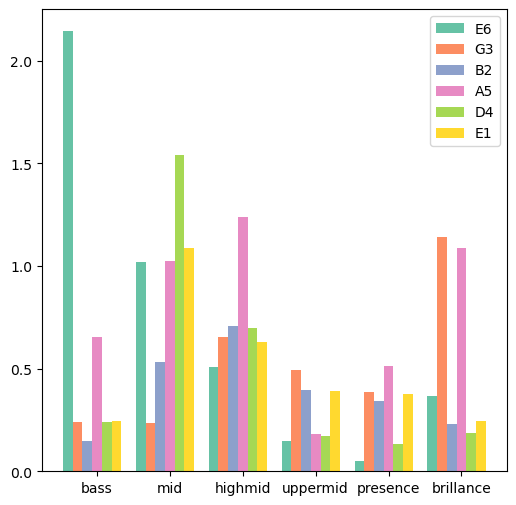

In [28]:
# bin power histogram 
wood_pack.bin_power_hist()
show()